In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
family = pd.read_csv('Data/familyxx.csv')
family["family_id"] = family["HHX"] + family["SRVY_YR"] + family["FMX"]
family.head()

person = pd.read_csv('Data/personsx.csv')
person["family_id"] = person["HHX"] + person["SRVY_YR"] + person["FMX"]
person.head()

merged = person.merge(family, on = 'family_id', how='inner')
merged

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,...,COVCONF,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT
0,1,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1,2,2,NaN,2,1,1,NaN,NaN
1,1,NaN,1,2,2.0,2.0,NaN,NaN,NaN,2.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
2,2,NaN,1,1,2.0,1.0,NaN,NaN,NaN,0.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
3,3,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
4,1,NaN,1,1,2.0,2.0,NaN,NaN,NaN,1.0,...,1.0,2,2,2,NaN,1,4,1,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73728,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,1.0,1,2,2,NaN,2,1,1,NaN,1.0
73729,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,4.0,5,1,1,2.0,2,1,1,2.0,1.0
73730,1,NaN,4,2,2.0,2.0,NaN,NaN,NaN,1.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0
73731,2,NaN,4,1,NaN,1.0,NaN,NaN,NaN,2.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0


In [3]:
merged = merged[merged["FDMEDYN"] < 7]
merged

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,...,COVCONF,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT
0,1,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1,2,2,NaN,2,1,1,NaN,NaN
1,1,NaN,1,2,2.0,2.0,NaN,NaN,NaN,2.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
2,2,NaN,1,1,2.0,1.0,NaN,NaN,NaN,0.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
3,3,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
4,1,NaN,1,1,2.0,2.0,NaN,NaN,NaN,1.0,...,1.0,2,2,2,NaN,1,4,1,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73728,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,1.0,1,2,2,NaN,2,1,1,NaN,1.0
73729,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,4.0,5,1,1,2.0,2,1,1,2.0,1.0
73730,1,NaN,4,2,2.0,2.0,NaN,NaN,NaN,1.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0
73731,2,NaN,4,1,NaN,1.0,NaN,NaN,NaN,2.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0


In [4]:
merged["LACHRC17"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
73728   NaN
73729   NaN
73730   NaN
73731   NaN
73732   NaN
Name: LACHRC17, Length: 73706, dtype: float64

In [5]:
# for checking number of null values
for i in merged.columns:
    if(merged[i].isnull().sum() > 0):
        merged = merged.drop([i], axis=1)

In [6]:
y_delay = merged[merged["FDMEDYN"] == 1]
y_delay

,FPX,INTV_QRT,SEX,FMX_x,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,R_MARITL,...,FHIPUBCT,FHIOGVCT,FHIIHSCT,FHIEXCT,FHICOST,FMEDBILL,FMEDBPAY,FSAF,FHICOVCT,FHICOVYN
1,1,1,2,1,1,1,2,12,1,1,...,0,0,0,0,2,1,1,2,3,1
2,2,1,1,1,2,2,2,12,1,1,...,0,0,0,0,2,1,1,2,3,1
3,3,1,1,1,4,4,2,12,1,7,...,0,0,0,0,2,1,1,2,3,1
11,1,1,1,1,1,1,2,12,3,4,...,0,0,0,0,2,1,1,2,1,1
12,1,1,1,1,1,1,2,12,1,1,...,0,0,0,0,5,1,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73692,3,4,1,1,4,4,2,12,1,0,...,0,0,0,0,4,2,2,2,4,1
73693,4,4,1,1,4,4,2,12,1,0,...,0,0,0,0,4,2,2,2,4,1
73725,1,4,2,2,13,1,2,12,1,7,...,0,0,0,0,2,1,2,2,0,2
73727,1,4,2,1,1,1,2,12,2,7,...,0,0,0,0,2,1,2,2,0,2


In [7]:
n_delay = merged[merged["FDMEDYN"] == 2]
n_delay

,FPX,INTV_QRT,SEX,FMX_x,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,R_MARITL,...,FHIPUBCT,FHIOGVCT,FHIIHSCT,FHIEXCT,FHICOST,FMEDBILL,FMEDBPAY,FSAF,FHICOVCT,FHICOVYN
0,1,1,2,1,1,1,2,12,1,4,...,0,0,0,0,1,2,2,2,1,1
4,1,1,1,1,1,1,2,12,1,1,...,0,0,0,0,2,2,2,1,4,1
5,2,1,2,1,2,2,2,12,1,1,...,0,0,0,0,2,2,2,1,4,1
6,3,1,1,1,4,4,2,12,1,0,...,0,0,0,0,2,2,2,1,4,1
7,4,1,1,1,4,4,2,12,1,0,...,0,0,0,0,2,2,2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73726,1,4,2,1,1,1,2,12,2,7,...,0,0,0,0,1,2,2,2,1,1
73728,1,4,2,3,13,1,2,12,1,7,...,0,0,0,0,1,2,2,2,1,1
73730,1,4,2,1,1,1,2,12,1,1,...,0,0,0,0,2,2,2,2,2,1
73731,2,4,1,1,2,2,2,12,1,1,...,0,0,0,0,2,2,2,2,2,1


#### Family sizes for families that delayed and damilies that didn't are similar

In [8]:
y_delay["FM_SIZE"].describe()

count    10305.000000
mean         3.308685
std          1.825753
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: FM_SIZE, dtype: float64

In [9]:
n_delay["FM_SIZE"].describe()

count    63401.000000
mean         3.234397
std          1.689117
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: FM_SIZE, dtype: float64

#### Those who didn't delay were on the older side but still similar in age to those who delayed

In [10]:
y_delay["AGE_P"].describe()

count    10305.000000
mean        37.236875
std         21.189219
min          0.000000
25%         19.000000
50%         37.000000
75%         55.000000
max         85.000000
Name: AGE_P, dtype: float64

In [11]:
n_delay["AGE_P"].describe()

count    63401.000000
mean        40.277882
std         23.631284
min          0.000000
25%         19.000000
50%         40.000000
75%         60.000000
max         85.000000
Name: AGE_P, dtype: float64

#### Those who delayed care had a lower family income to poverty threshold 

In [16]:
y_delay["RAT_CAT4"].describe()

count    10305.000000
mean        13.866958
std         20.567060
min          1.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         99.000000
Name: RAT_CAT4, dtype: float64

In [15]:
n_delay["RAT_CAT4"].describe()

count    63401.000000
mean        16.916105
std         22.652433
min          1.000000
25%          8.000000
50%         13.000000
75%         14.000000
max         99.000000
Name: RAT_CAT4, dtype: float64

#### Similar responses when asked if anyone in the family had health insurance

In [169]:
n_delay["FHICOVYN"].describe()

count    63401.000000
mean         1.049447
std          0.406725
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: FHICOVYN, dtype: float64

In [170]:
y_delay["FHICOVYN"].describe()

count    10305.000000
mean         1.105774
std          0.387938
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: FHICOVYN, dtype: float64

In [58]:
merged.head()

,FPX,INTV_QRT,SEX,FMX_x,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,R_MARITL,MRACRPI2,RACERPI2,HISCODI3,MRACBPI2,AGE_P,RECTYPE_x,SRVY_YR_x,PARENTS,FMOTHER1,FFATHER1,HHX_x,WTIA,WTFA,INTV_MON,REGION,PSTRAT,PPSU,PDMED12M,PNMED12M,PHOSPYR2,PHCHM2W,PHCPH2WR,PHCDV2W,P10DVYR,PLAWALK,PLAREMEM,PLIMANY,PHSTAT,LA1AR,LACHRONR,FINCINT,PSSRR,PPENS,POPENS,PSSI,PTANF,POWBEN,PINTRSTR,PDIVD,PCHLDSP,PINCOT,PSSAPL,PSDAPL,ELIGPWIC,HIKINDNA,HIKINDNB,HIKINDNC,HIKINDND,HIKINDNE,HIKINDNF,HIKINDNG,HIKINDNH,HIKINDNI,HIKINDNJ,HIKINDNK,SINCOV,HCSPFYR,MEDBILL,MEDBPAY,FSA,PRIVATE,MEDICARE,MEDICAID,SCHIP,MILITARN,IHS,OTHPUB,OTHGOV,SINGLE,NOTCOV,REGIONBR,GEOBRTH,CITIZENP,PLBORN,EDUC1,family_id,FINT_Y_P,FINT_M_P,FMX_y,RECTYPE_y,SRVY_YR_y,HHX_y,FM_SIZE,FM_STRCP,FM_TYPE,FM_STRP,TELN_FLG,TELCELN,FLNGINTV,WTFA_FAM,FM_KIDS,FM_ELDR,FM_EDUC1,F10DVCT,F10DVYN,FDMEDCT,FDMEDYN,FHCDVCT,FHCDVYN,FHCHMCT,FHCHMYN,FHCPHRCT,FHCPHRYN,FHOSP2CT,FHOSP2YN,FNMEDCT,FNMEDYN,FSRUNOUT,FSLAST,FSBALANC,FDGLWCT1,FDGLWCT2,FLAADLYN,FLIADLYN,FWKLIMYN,FWALKYN,FREMEMYN,FANYLYN,FLIADLCT,FWKLIMCT,FWALKCT,FREMEMCT,FANYLCT,FHSTATEX,FHSTATVG,FHSTATG,FHSTATFR,FHSTATPR,FLAADLCT,HOUSEOWN,FSNAP,INCGRP4,INCGRP5,RAT_CAT4,RAT_CAT5,FSALYN,FSEINCYN,FSSRRYN,FPENSYN,FOPENSYN,FSSIYN,FTANFYN,FOWBENYN,FINTR1YN,FDIVDYN,FCHSPYN,FINCOTYN,FSSAPLYN,FSDAPLYN,FSALCT,FSEINCCT,FSSRRCT,FPENSCT,FOPENSCT,FSSICT,FTANFCT,FOWBENCT,FINTR1CT,FDIVDCT,FCHSPCT,FINCOTCT,FSSAPLCT,FSDAPLCT,FHIPRVCT,FHISINCT,FHICARCT,FHICADCT,FHICHPCT,FHIMILCT,FHIPUBCT,FHIOGVCT,FHIIHSCT,FHIEXCT,FHICOST,FMEDBILL,FMEDBPAY,FSAF,FHICOVCT,FHICOVYN
0,1,1,2,1,1,1,2,12,1,4,1,1,2,1,79,20,2018,4,0,0,1,3338.5,3539,1,3,103,19,2,2,2,2,1,1,2,2,2,2,3,2,0,1,1,2,2,2,2,2,2,2,2,2,2,2,0,2,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,3,1,3,3,3,2,3,3,3,2,1,1,1,1,9,2020,2018,1,1,60,2018,1,1,11,1,11,1,1,1,3539,0,1,2,0,2,0,2,1,1,0,2,1,1,0,2,0,2,3,3,3,0,0,2,2,2,2,2,2,0,0,0,0,0,0,0,1,0,0,0,1,2,1,1,5,5,2,2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,2,2,1,1
1,1,1,2,1,1,1,2,12,1,1,1,1,2,1,55,20,2018,4,0,0,4,5187.6,5656,1,2,137,38,1,1,2,2,2,2,9,2,2,2,3,2,0,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,3,3,3,3,2,3,3,1,2,1,1,1,1,14,2023,2018,1,1,60,2018,4,3,41,4,41,1,1,1,5656,1,0,5,0,9,2,1,0,2,0,2,0,2,0,2,1,1,2,2,3,1,0,2,2,2,2,2,2,0,0,0,0,0,0,0,3,0,0,0,3,2,2,2,7,7,1,2,2,2,2,2,2,2,2,2,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,0,0,0,0,0,0,0,0,2,1,1,2,3,1
2,2,1,1,1,2,2,2,12,1,1,1,1,2,1,49,20,2018,4,0,0,4,5187.6,5848,1,2,137,38,1,2,2,2,2,2,9,2,2,2,3,2,0,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,3,3,3,3,2,3,3,1,2,1,1,1,1,15,2023,2018,1,1,60,2018,4,3,41,4,41,1,1,1,5656,1,0,5,0,9,2,1,0,2,0,2,0,2,0,2,1,1,2,2,3,1,0,2,2,2,2,2,2,0,0,0,0,0,0,0,3,0,0,0,3,2,2,2,7,7,1,2,2,2,2,2,2,2,2,2,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,0,0,0,0,0,0,0,0,2,1,1,2,3,1
3,3,1,1,1,4,4,2,12,1,7,1,1,2,1,16,20,2018,3,1,2,4,5187.6,5886,1,2,137,38,2,2,2,2,2,2,9,2,2,2,3,2,0,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,3,3,3,3,2,3,3,1,2,1,1,1,1,10,2023,2018,1,1,60,2018,4,3,41,4,41,1,1,1,5656,1,0,5,0,9,2,1,0,2,0,2,0,2,0,2,1,1,2,2,3,1,0,2,2,2,2,2,2,0,0,0,0,0,0,0,3,0,0,0,3,2,2,2,7,7,1,2,2,2,2,2,2,2,2,2,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,0,0,0,0,0,0,0,0,2,1,1,2,3,1
4,1,1,1,1,1,1,2,12,1,1,1,1,2,1,37,20,2018,4,0,0,6,5259.3,6009,2,3,106,22,2,2,2,2,2,2,2,2,2,2,3,2,0,1,2,2,2,2,2,2,1,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,3,3,3,2,3,3,3,2,1,1,1,1,21,2025,2018,2,1,60,2018,6,4,41,4,41,1,1,1,5415,2,0,9,1,1,0,2,2,1,0,2,0,2,0,2,0,2,3,3,3,2,0,2,2,2,2,2,2,0,0,0,0,0,2,1,1,0,0,0,1,2,5,4,14,14,1,2,2,2,2,2,2,2,1,1,2,2,2,2,2,0,0,0,0,0,0,0,4,2,0,0,0,0,4,0,0,0,0,0,0,0,0,0,2,2,2,1,4,1


In [150]:
X = merged[["FINCINT", "OTHGOV", "PHCHM2W", "FINT_Y_P", "HIKINDNC", "OTHPUB", "HIKINDNG", "PLAWALK", "PTANF", "IHS", "HIKINDNE"]]
y = merged["FDMEDYN"]

# removed cos lowest importance "FOWBENYN"

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

y_pred_class = rf_model.predict(X_train)
training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
training_error = 1 - training_accuracy

y_pred_class = rf_model.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy
print("Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

Test accuracy: 0.8616876950210284, Test error: 0.13831230497897162


In [152]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00      2041
           2       0.86      1.00      0.93     12701

    accuracy                           0.86     14742
   macro avg       0.93      0.50      0.46     14742
weighted avg       0.88      0.86      0.80     14742



In [153]:
# sort by highest feature importance
sorted_idx = rf_model.feature_importances_.argsort()
sorted_idx
X.columns[sorted_idx]

Index(['OTHGOV', 'IHS', 'FINT_Y_P', 'FINCINT', 'HIKINDNG', 'OTHPUB',
       'HIKINDNE', 'HIKINDNC', 'PTANF', 'PHCHM2W', 'PLAWALK'],
      dtype='object')

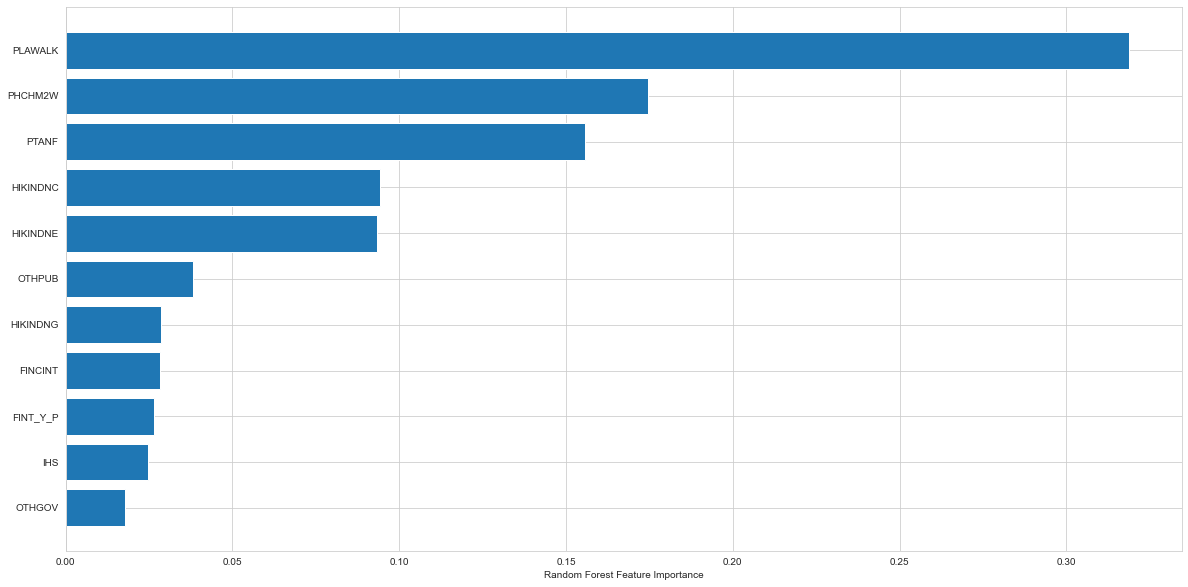

In [154]:
# sort by highest feature importance
sorted_idx = rf_model.feature_importances_.argsort()
#plt.barh(X.columns[sorted_idx], rf_model.feature_importances_[sorted_idx], color='black')
plt.barh(X.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
rf_model.feature_importances_[sorted_idx]

In [155]:
for i in range(10):
    print("\"" + X.columns[sorted_idx][i] + "\"" + ", ", end="")

"OTHGOV", "IHS", "FINT_Y_P", "FINCINT", "HIKINDNG", "OTHPUB", "HIKINDNE", "HIKINDNC", "PTANF", "PHCHM2W", 

In [111]:
y_delay["PHCHM2W"].describe()

count    10305.000000
mean         1.989326
std          0.173682
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          9.000000
Name: PHCHM2W, dtype: float64

In [110]:
n_delay["PHCHM2W"].describe()

count    63401.000000
mean         1.988738
std          0.155649
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          9.000000
Name: PHCHM2W, dtype: float64

In [156]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [166]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

clf.fit(X_train, y_train)

y_pred_class = clf.predict(X_test)

testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy
print("Test accuracy: {0}, Test error: {1}".format(testing_accuracy, testing_error))

Test accuracy: 0.8615520282186949, Test error: 0.13844797178130508


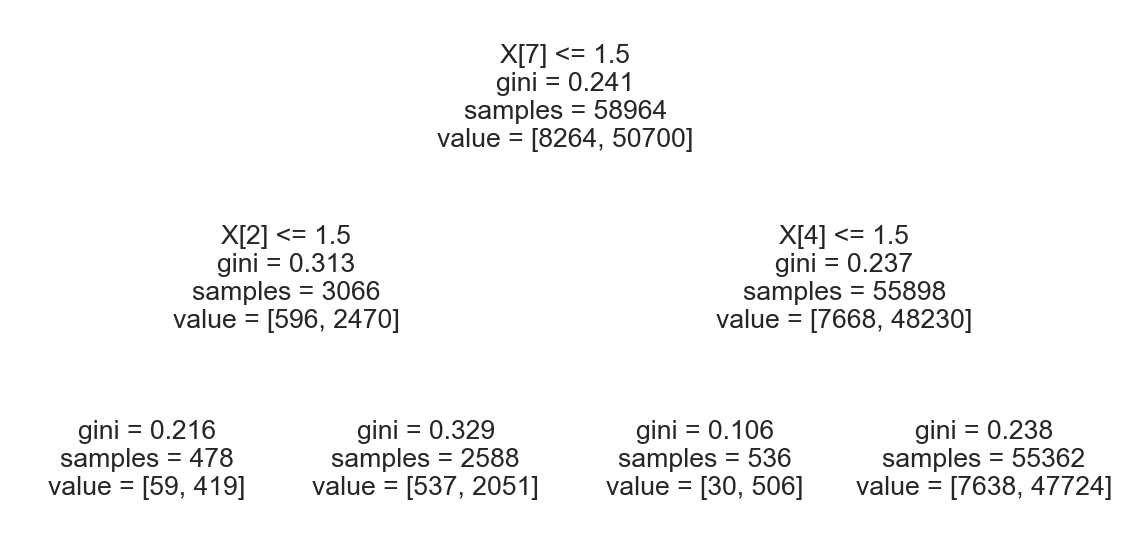

In [167]:
tree.plot_tree(clf);


In [168]:
print(X.columns[7])
print(X.columns[4])
print(X.columns[2])

PLAWALK
HIKINDNC
PHCHM2W


Top Features  
For RF model take into consideration that model performed best with the people who didn't delay care hence these traits may be more indicative of that group  
1) PLAWALK  
- Does have difficulty walking without equipment?
- Factor possibly related to accessibility

2) PHCHM2W  
- Did receive HOME care by health professional, 2 wk 
- Factor possibly related to accessibility

3) PTANF  
- Received income from a state or county welfare program (e.g., TANF)
- Cost/affordability related factor